# Image-Text Matching
เป็นการจับคู่ภาพเชื่อมโยงกับข้อความ เช่น การค้นหาภาพจากข้อความหรือ ข้อความภจากภาพ เหมาะกับ ระบบค้นหาอัจฉริยะ จะใช้ Model BLIP  
**BLIP ทำอะไรได้บ้าง**


1.   Image Capturing
2.   Image-Text Retrieval / Text-Image Retrieval
3.   Visual Question Answering



In [11]:
# !pip install transformers torch pillow
# google colab already provide these lib

In [12]:
from transformers import pipeline
from PIL import Image
import matplotlib.pyplot as plt


In [13]:
!wget https://www.vets4pets.com/siteassets/species/cat/two-cats-on-wall-in-sun.jpg -O cats.jpg
!wget https://www.worldanimalprotection.ca/cdn-cgi/image/width=1280,format=auto/siteassets/shutterstock_481623085.jpg -O cows.jpg
!wget https://supertails.com/cdn/shop/articles/1c3a0644-1ffb-4641-b2ea-5483b4ada874_520x500_a001116b-8f20-4bef-8b4c-2a57a1882223.webp?v=1734423067 -O dogs.jpg

--2025-10-07 00:27:50--  https://www.vets4pets.com/siteassets/species/cat/two-cats-on-wall-in-sun.jpg
Resolving www.vets4pets.com (www.vets4pets.com)... 104.18.42.192, 172.64.145.64, 2606:4700:4401::ac40:9140, ...
Connecting to www.vets4pets.com (www.vets4pets.com)|104.18.42.192|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 444966 (435K) [image/jpeg]
Saving to: ‘cats.jpg’

cats.jpg            100%[===================>] 434.54K  --.-KB/s    in 0.005s  

2025-10-07 00:27:50 (79.3 MB/s) - ‘cats.jpg’ saved [444966/444966]

--2025-10-07 00:27:50--  https://www.worldanimalprotection.ca/cdn-cgi/image/width=1280,format=auto/siteassets/shutterstock_481623085.jpg
Resolving www.worldanimalprotection.ca (www.worldanimalprotection.ca)... 104.18.42.31, 172.64.145.225, 2a06:98c1:3106::ac40:91e1, ...
Connecting to www.worldanimalprotection.ca (www.worldanimalprotection.ca)|104.18.42.31|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 115127 (112K) [

In [14]:
# Load model directly
from transformers import AutoProcessor, BlipForImageTextRetrieval

processor = AutoProcessor.from_pretrained("Salesforce/blip-itm-base-coco")
model = BlipForImageTextRetrieval.from_pretrained("Salesforce/blip-itm-base-coco")

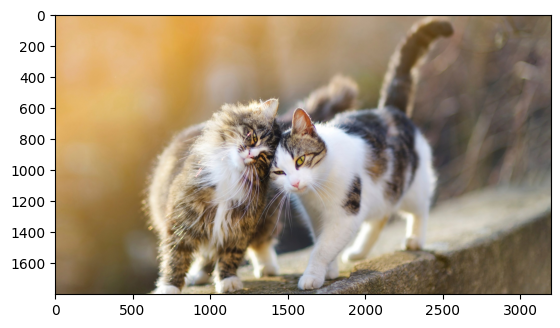

In [15]:
image = Image.open('cats.jpg')
plt.imshow(image)
plt.show()

In [16]:
text = "Image of four cats"

In [20]:
input = processor(images=image, text=text, return_tensors='pt')
# return tpye เป็น Tesor ของ gpu ให้ gpu อ่านได้

In [18]:
output = model(**input)

In [19]:
print(output)

BlipImageTextMatchingModelOutput(itm_score=tensor([[ 2.1151, -2.1134]], grad_fn=<AddmmBackward0>), loss=None, image_embeds=None, last_hidden_state=tensor([[[ 0.4196,  0.4775, -0.0287,  ..., -0.5300,  0.8885,  0.3785],
         [-0.4638,  0.0221, -0.1470,  ..., -0.2883,  0.5163,  0.7957],
         [-0.2528,  0.0658, -0.2232,  ..., -0.0475,  0.2616,  1.0011],
         ...,
         [-0.0640,  0.4777,  0.6287,  ...,  0.0731,  0.4945,  0.0880],
         [-0.2172,  0.4252,  0.5607,  ..., -0.3953,  0.6192,  0.0187],
         [-0.1660,  0.5189,  0.1279,  ..., -0.0735, -0.6020,  0.7706]]],
       grad_fn=<NativeLayerNormBackward0>), hidden_states=None, vision_pooler_output=None, attentions=None, question_embeds=tensor([[[ 0.0434,  0.0170, -0.0414,  ..., -0.0398,  0.0199,  0.1112],
         [ 0.0020,  0.0171, -0.0061,  ..., -0.0195,  0.0621,  0.1281],
         [ 0.0089,  0.0235, -0.0106,  ..., -0.0238,  0.0490,  0.1116],
         [ 0.1288,  0.1141,  0.0203,  ..., -0.0647,  0.1072,  0.1449],
   

In [21]:
output.keys()

odict_keys(['itm_score', 'last_hidden_state', 'question_embeds'])

In [24]:
output['itm_score']
# ค่าแรกเป็นค่าแสดงถึงความไม่ Match กัน
# ค่าสองแสดงถึงความ Match กัน ระหว่าง Text กับ ข้อความ

tensor([[ 2.1151, -2.1134]], grad_fn=<AddmmBackward0>)

In [26]:
# Change result to probability to easy for decission
import torch
itm_score = torch.nn.functional.softmax(output['itm_score'], dim=1)

In [27]:
print(itm_score)
# From probability that the text isn't match to image

tensor([[0.9856, 0.0144]], grad_fn=<SoftmaxBackward0>)


In [28]:
text = "image of two cats"

In [37]:
input = processor(images=image, text=text, return_tensors='pt')

In [38]:
output = model(**input)

In [39]:
print(output['itm_score'])

tensor([[-0.7385,  0.7404]], grad_fn=<AddmmBackward0>)


In [40]:
import torch
result_in_probability = torch.nn.functional.softmax(output['itm_score'], dim=1)

In [42]:
print(result_in_probability)
# From the result said that the image and text is matching

tensor([[0.1856, 0.8144]], grad_fn=<SoftmaxBackward0>)


In [45]:
# use only probability result
print("Probabilty: ", round(result_in_probability[0][1].item(),2))

Probabilty:  0.81


In [46]:
text2 = "An image of many dogs"
text3 = "An image of many cows"

In [47]:
image2 = Image.open("dogs.jpg")
image3 = Image.open("cows.jpg")

In [48]:
input2 = processor(images=image2, text=text2, return_tensors='pt')
input3 = processor(images=image3, text=text3, return_tensors='pt')

In [55]:
result2 = model(**input2)

In [50]:
result3 = model(**input3)

In [62]:
print(result3['itm_score'])

tensor([[-0.0142,  0.0148]], grad_fn=<AddmmBackward0>)


In [65]:
import torch
def get_result_in_probability(result):
  output = torch.nn.functional.softmax(result, dim=1)
  return "Probability: ", round(output[0][1].item(), 2)

In [66]:
result2_prob = get_result_in_probability(result2['itm_score'])
result3_prob = get_result_in_probability(result3['itm_score'])

In [67]:
print(result2_prob)
print(result3_prob)

('Probability: ', 0.96)
('Probability: ', 0.51)
